# Mustererkennung/Machine Learning - Assignment 8



In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)


data = pd.read_csv("../data/iris.csv", header=None)
data.head(n=5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Splitting the data into training/test and according to their class memberships

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data[list(range(4))], data[4], test_size=0.33, random_state=42, stratify=None)

X_train_setosa = X_train[y_train=='Setosa'].to_numpy()
X_train_versicolor = X_train[y_train=='Versicolor'].to_numpy()
X_train_virginica = X_train[y_train=='Virginica'].to_numpy()

X_test_setosa_v_v = X_test.to_numpy()
y_test_setosa_v_v = (y_test == 'Setosa').astype(int).to_numpy()

X_test_versicolor_virginica = X_test[y_test!='Setosa'].to_numpy()
y_test_versicolor_virginica = (y_test[y_test!='Setosa'] == 'Versicolor').astype(int).to_numpy()

In [78]:
print(X_train)

       0    1    2    3
96   5.7  2.9  4.2  1.3
105  7.6  3.0  6.6  2.1
66   5.6  3.0  4.5  1.5
0    5.1  3.5  1.4  0.2
122  7.7  2.8  6.7  2.0
..   ...  ...  ...  ...
71   6.1  2.8  4.0  1.3
106  4.9  2.5  4.5  1.7
14   5.8  4.0  1.2  0.2
92   5.8  2.6  4.0  1.2
102  7.1  3.0  5.9  2.1

[100 rows x 4 columns]


In [242]:
# using mathematical explanation https://www.youtube.com/watch?v=4Gac5I64LM4
import random

class Perceptron():

    def __init__(self):
        self.weights = []  # w = [1, w1, w2, w3...]
        self.errors = []  # Number of misclassifications

        
    def fit(self, X, y, learning_rate = 0.2, num_iteration = 100):
        
        # initialise w_i = 1/N for all i from [1..N]
        self.weights = np.zeros(X.shape[1])
        #self.weights[0] = 1
        
        # Launch the training algorithm
        for i in range(num_iteration):
            err = 0
            for xi, target in zip(X, y):
                delta_w = learning_rate * (target - self.predict(xi))
                self.weights = np.add(self.weights, (delta_w * xi))
                self.weights[0] = self.weights[0] +  delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
 
    def predict(self, X):
        """Return class label after unit step"""
        label = np.dot(X, self.weights)
        return np.where(label >= 0.0, 1, 0)
    
    def predict_swp(self, X):
        # The activation start with the bias at weights == 0
        activation = self.weights[0]

        # We iterate over the weights and the features in the given row
        for weight, feature in zip(self.weights[1:], X):
            
            activation = activation + (float(weight) * float(feature))

        # Heaviside Step Function Activation
        if activation >= 0.0:
            return 1.0
        return 0.0
    

In [243]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa 
# and 50 Iris-Versicolor flowers, respectively:
y_sep_vers = df.iloc[0:100, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Setosa) 
# that we assign to a vector y
y_sep_vers = np.where(y_sep_vers == 'Iris-versicolor', 1, 0)
print("y_sep_vers:", y_sep_vers)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_sep_vers = df.iloc[0:100, [0, 2]].values

#===========
y_vers_virg = df.iloc[50:150, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Iris-virginica) 
# that we assign to a vector y
y_vers_virg = np.where(y_vers_virg == 'Iris-versicolor', 1, 0)
print("y_vers_virg:", y_vers_virg)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_vers_virg = df.iloc[50:150, [0, 2]].values



y_sep_vers: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_vers_virg: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


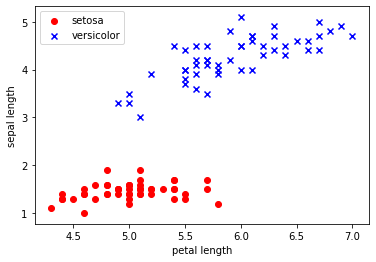

In [244]:
plt.scatter(X_sep_vers[:50, 0], X_sep_vers[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_sep_vers[50:100, 0], X_sep_vers[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

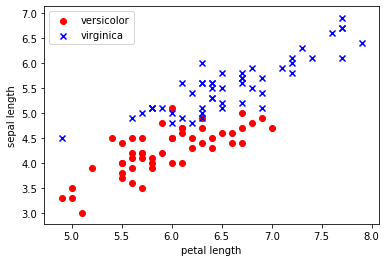

In [245]:
plt.scatter(X_vers_virg[:50, 0], X_vers_virg[:50, 1], color='red', marker='o', label='versicolor')
plt.scatter(X_vers_virg[50:100, 0], X_vers_virg[50:100, 1], color='blue', marker='x', label='virginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

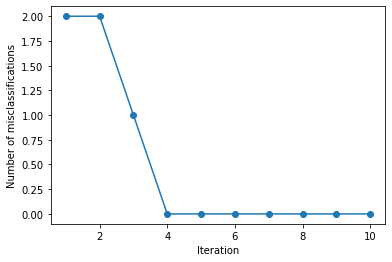

In [246]:
model = Perceptron()
model.fit(X_sep_vers, y_sep_vers, learning_rate = 0.1, num_iteration = 10)

plt.plot(range(1, len(model.errors) + 1), model.errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Number of misclassifications')
plt.show()

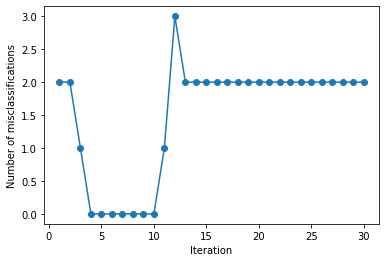

In [247]:
model.fit(X_vers_virg, y_vers_virg, learning_rate = 0.1, num_iteration = 20)

plt.plot(range(1, len(model.errors) + 1), model.errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Number of misclassifications')
plt.show()